In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import MP_evals, mpPDF, fitKDE

In [2]:
P = 10000
N = 1000

In [117]:
# Generating a random matrix
eVals = MP_evals(P,N, diagonal=True)
pdf_MP = mpPDF(alpha=P / N, var=1, pts=1000)
pdf_empirical= fitKDE(np.diag(eVals), bWidth=0.01)

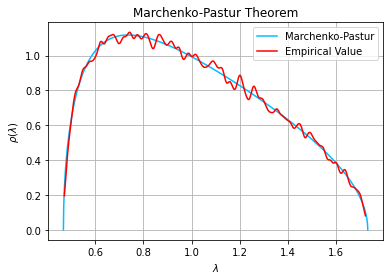

In [118]:
pdf_MP.plot(title="Marchenko-Pastur Theorem", label="Marchenko-Pastur", color="deepskyblue")
pdf_empirical.plot(label="Empirical Value", color="red")
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$\rho(\lambda)$")
plt.grid(True)
plt.legend(loc="upper right")
plt.show()

In [3]:
from utils import randomCov, corr_from_cov, eigen_dcmp, find_lambda_max
import pandas as pd

In [16]:
SNR, N, M, alpha = .995, 1000, 100, 10

In [17]:
# Generate Random Matrix reperesenting Gaussian signal
signal = np.random.normal(size=(N * alpha, N))

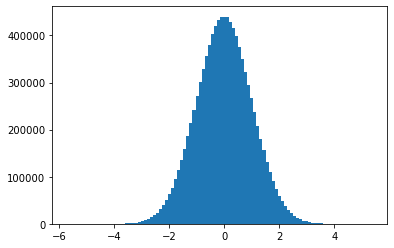

In [18]:
plt.hist(signal.flatten(), bins=100)
plt.show()

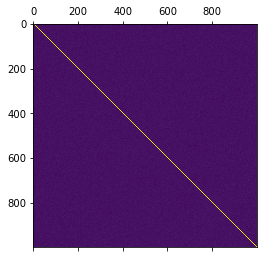

In [19]:
# Covariance Matrix of the signal
cov = np.cov(signal, rowvar=0)
plt.matshow(cov)
plt.show()

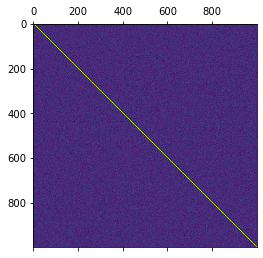

In [29]:
# Adding noise to Covariance Matrix
noised_cov = SNR * cov + (1 - SNR) * randomCov(N, M, True)
plt.matshow(noised_cov)
plt.show()

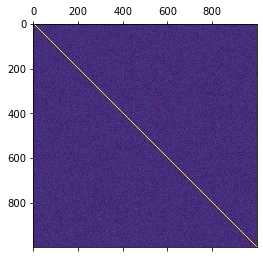

In [30]:
corr = corr_from_cov(noised_cov)
plt.matshow(corr)
plt.show()

In [31]:
eVals, _ = eigen_dcmp(corr, diagonal=True)
# Finding lambda_max and variance attributed to noise
lambda_max, noise_variance = find_lambda_max(np.diag(eVals), alpha, bWidth=0.01)
signal_amount = eVals.shape[0] - np.diag(eVals)[::-1].searchsorted(lambda_max)
print("# of signal eigenvalues:", signal_amount)

# of signal eigenvalues: 100


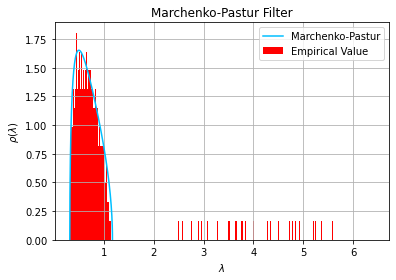

In [32]:
pdf_MP = mpPDF(alpha=alpha, var=noise_variance, pts=1000)
pdf_empirical = fitKDE(np.diag(eVals), bWidth=0.01)
pdf_MP.plot(label="Marchenko-Pastur", color="deepskyblue")
plt.hist(pd.Series(np.diag(eVals)), density="norm", bins=1000, label="Empirical Value", color="red")
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$\rho(\lambda)$")
plt.legend(loc="upper right")
plt.title("Marchenko-Pastur Filter")
plt.grid(True)
plt.show()

In [28]:
w = np.random.normal(size=(N, M))

In [84]:
### gives min(N, M)
np.linalg.matrix_rank(w)

100

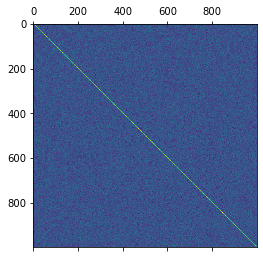

shape of random cov matrix (1000, 1000)


100

In [85]:
cov_rank_M = np.dot(w, w.T)
plt.matshow(cov_rank_M)
plt.show()
print("shape of random cov matrix",cov_rank_M.shape)
np.linalg.matrix_rank(cov_rank_M)

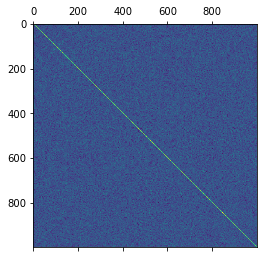

shape of random cov matrix (1000, 1000)


1000

In [86]:
rcov =cov_rank_M + np.diag(np.random.uniform(size=N)) # full rank
plt.matshow(rcov)
plt.show()
print("shape of random cov matrix",rcov.shape)
np.linalg.matrix_rank(rcov)